In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [168]:
data=pd.read_csv('hackerearth human right/train.csv')

C:\Users\ajay\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3147: DtypeWarning: Columns (16,17,18,19,20,22,23,24,25,26,27,28,45,49,50,51) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [169]:
data.head()

,appno,application,country.alpha2,country.name,decisiondate,docname,doctypebranch,ecli,introductiondate,issue.0,...,ccl_article=6,ccl_article=7,ccl_article=8,ccl_article=9,ccl_article=p1,ccl_article=p12,ccl_article=p4,ccl_article=p6,ccl_article=p7,importance
0,2052/08,MS WORD,ru,Russian Federation,NaN,CASE OF KOKOSHKINA v. RUSSIA,CHAMBER,ECLI:CE:ECHR:2009:0528JUD000205208,NaN,NaN,...,0,0,0,0,0,0,0,0,0,4
1,4728/07,MS WORD,tr,Turkey,NaN,CASE OF ÖZCAN v. TURKEY,COMMITTEE,ECLI:CE:ECHR:2018:0710JUD000472807,NaN,NaN,...,0,0,0,0,0,0,0,0,0,4
2,44135/06,MS WORD,si,Slovenia,NaN,CASE OF DANIJEL PEČNIK v. SLOVENIA,CHAMBER,ECLI:CE:ECHR:2012:1018JUD004413506,NaN,NaN,...,1,0,0,0,0,0,0,0,0,4
3,2607/08,MS WORD,ch,Switzerland,NaN,CASE OF PALANCI v. SWITZERLAND,CHAMBER,ECLI:CE:ECHR:2014:0325JUD000260708,NaN,NaN,...,0,0,-1,0,0,0,0,0,0,4
4,27001/06,MS WORD,ru,Russian Federation,NaN,CASE OF AMANAT ILYASOVA AND OTHERS v. RUSSIA,CHAMBER,ECLI:CE:ECHR:2009:1001JUD002700106,NaN,NaN,...,0,0,0,0,0,0,0,0,0,4


In [170]:
data.shape

(8878, 328)

In [171]:
data1=data.copy()

In [172]:
objects=[i for i in data.columns ]

In [173]:
len(objects)

328

In [174]:
data['respondentOrderEng'].dtype

dtype('int64')

In [175]:
data['parties.0'].unique

<bound method Series.unique of 0                       KOKOSHKINA
1                            ÖZCAN
2                   DANIJEL PEČNIK
3                          PALANCI
4       AMANAT ILYASOVA AND OTHERS
                   ...            
8873           RASHITOV AND OTHERS
8874                       URMANOV
8875                     BABUSHKIN
8876     BRUALLA GÓMEZ DE LA TORRE
8877                           TUR
Name: parties.0, Length: 8878, dtype: object>

C:\Users\ajay\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='importance', ylabel='count'>

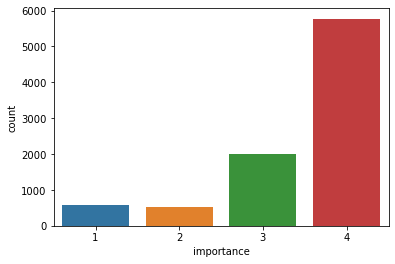

In [176]:
sns.countplot(data['importance'])

In [275]:
columns_to_consider=['appno','country.alpha2','doctypebranch','originatingbody','originatingbody_name','respondent.0','respondent.1','respondentOrderEng','separateopinion','typedescription','article=3','article=6','article=P1','article=5','article=8','article=13','article=10','article=2','article=34','article=41','article=38','article=35','article=4','article=29','article=14','article=P12','article=9','article=1','article=11','article=46','article=P4',
'article=17',
'article=18',
'article=7',
'article=',
'article=37',
'article=P7',
 'article=57',
 'article=26',
 'article=27',
 'article=36',
 'article=30',
 'article=12',
 'article=56',
 'article=39',
 'article=15',
 'article=25',
 'article=P6',
 'article=19',
 'article=32',
 'article=33',
 'article=53',
 'article=28',
 'article=43',
 'article=52',
 'article=P13',
 'article=16',
 'documentcollectionid=CASELAW',
 'documentcollectionid=JUDGMENTS',
 'documentcollectionid=CHAMBER',
 'documentcollectionid=ENG',
 'documentcollectionid=COMMITTEE',
 'documentcollectionid=GRANDCHAMBER']


In [276]:
X=data1[columns_to_consider]

In [244]:
object=[i for i in X.columns if X[i].dtype=='O']

In [245]:
object

['appno',
 'country.alpha2',
 'doctypebranch',
 'originatingbody_name',
 'respondent.0',
 'respondent.1']

In [246]:
l=[i for i in X.columns if X[i].isnull=='True']

In [247]:
l

[]

C:\Users\ajay\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='country.alpha2', ylabel='count'>

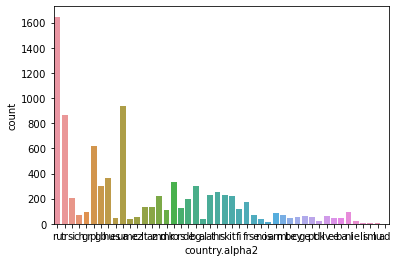

In [248]:
sns.countplot(X['country.alpha2'])

In [249]:
len(X['respondent.1'].unique())

15

In [277]:
X.drop(['appno','respondent.1'],axis=1,inplace=True)

C:\Users\ajay\Anaconda3\lib\site-packages\pandas\core\frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [278]:
y=data1['importance']

In [279]:
X.shape

(8878, 61)

In [280]:
from sklearn.model_selection import train_test_split,GridSearchCV


In [281]:
X=pd.get_dummies(X)

In [287]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=.2)

In [288]:
from sklearn.ensemble import RandomForestClassifier

In [289]:
X.head()

,originatingbody,respondentOrderEng,separateopinion,typedescription,article=3,article=6,article=P1,article=5,article=8,article=13,...,respondent.0_PRT,respondent.0_ROU,respondent.0_RUS,respondent.0_SMR,respondent.0_SRB,respondent.0_SVK,respondent.0_SVN,respondent.0_SWE,respondent.0_TUR,respondent.0_UKR
0,4,38,False,15,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,26,47,False,15,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,23,43,True,15,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,5,46,True,15,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,4,38,False,15,1,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0


In [285]:
X.shape

(8878, 165)

In [290]:
gd=GridSearchCV(RandomForestClassifier(),{'n_estimators':[50,100,120],'max_depth':[18,20,25]},cv=5).fit(X_train,y_train)

In [291]:
gd.best_params_

{'max_depth': 20, 'n_estimators': 50}

In [292]:
gd.best_score_

0.8455384523892121

In [293]:
gd.best_estimator_.score(X_test,y_test)

0.8462837837837838

In [294]:
test=pd.read_csv('hackerearth human right/test.csv')

C:\Users\ajay\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3147: DtypeWarning: Columns (14,15,16,17,18,19,20,22,23,24,25,49,50,51) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [295]:
test.head()

,appno,application,country.alpha2,country.name,decisiondate,docname,doctypebranch,ecli,introductiondate,issue.0,...,ccl_article=5,ccl_article=6,ccl_article=7,ccl_article=8,ccl_article=9,ccl_article=p1,ccl_article=p12,ccl_article=p4,ccl_article=p6,ccl_article=p7
0,1194/04,MS WORD,mk,North Macedonia,NaN,"CASE OF CAMINSKI v. ""THE FORMER YUGOSLAV REPUB...",COMMITTEE,ECLI:CE:ECHR:2011:0224JUD000119404,NaN,NaN,...,0,1,0,0,0,0,0,0,0,0
1,53865/11,MS WORD,ua,Ukraine,NaN,CASE OF KUSHCH v. UKRAINE,CHAMBER,ECLI:CE:ECHR:2015:1203JUD005386511,NaN,NaN,...,1,0,0,0,0,0,0,0,0,0
2,43838/07,MS WORD,ie,Ireland,NaN,CASE OF O. v. IRELAND,COMMITTEE,ECLI:CE:ECHR:2012:0119JUD004383807,NaN,NaN,...,0,1,0,0,0,0,0,0,0,0
3,11157/04,MS WORD,ru,Russian Federation,NaN,CASE OF ANCHUGOV AND GLADKOV v. RUSSIA,CHAMBER,ECLI:CE:ECHR:2013:0704JUD001115704,NaN,"Articles 32-33,134 and 135 of the Constitution",...,0,0,0,0,0,0,0,0,0,0
4,42443/02,MS WORD,ru,Russian Federation,NaN,CASE OF EMINBEYLI v. RUSSIA,CHAMBER,ECLI:CE:ECHR:2009:0226JUD004244302,NaN,"Articles 1, 11, 89, 96 and 122 of the Code of ...",...,1,0,0,0,0,0,0,0,0,0


In [296]:
data2=test.copy()

In [297]:
data2=test[columns_to_consider]

In [298]:
data2.head()

,appno,country.alpha2,doctypebranch,originatingbody,originatingbody_name,respondent.0,respondent.1,respondentOrderEng,separateopinion,typedescription,...,article=43,article=52,article=P13,article=16,documentcollectionid=CASELAW,documentcollectionid=JUDGMENTS,documentcollectionid=CHAMBER,documentcollectionid=ENG,documentcollectionid=COMMITTEE,documentcollectionid=GRANDCHAMBER
0,1194/04,mk,COMMITTEE,29,Fith Section Committee,MKD,NaN,33,False,15,...,0,0,0,0,1,1,0,1,1,0
1,53865/11,ua,CHAMBER,23,Fith Section,UKR,NaN,48,False,15,...,0,0,0,0,1,1,1,1,0,0
2,43838/07,ie,COMMITTEE,29,Fith Section Committee,IRL,NaN,22,False,15,...,0,0,0,0,1,1,0,1,1,0
3,11157/04,ru,CHAMBER,4,First Section,RUS,NaN,38,False,15,...,0,0,0,0,1,1,1,1,0,0
4,42443/02,ru,CHAMBER,4,First Section,RUS,NaN,38,False,15,...,0,0,0,0,1,1,1,1,0,0


C:\Users\ajay\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='respondentOrderEng', ylabel='count'>

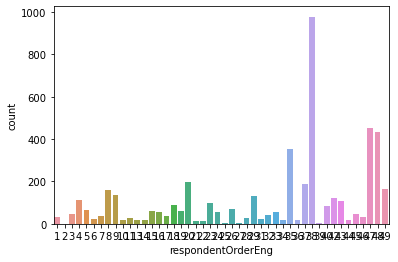

In [299]:
sns.countplot(data2['respondentOrderEng'])

In [300]:
len(data2['respondent.1'].unique())

10

In [301]:
data2.shape

(4760, 63)

In [302]:
data2.isnull().any()

appno                                False
country.alpha2                       False
doctypebranch                        False
originatingbody                      False
originatingbody_name                 False
                                     ...  
documentcollectionid=JUDGMENTS       False
documentcollectionid=CHAMBER         False
documentcollectionid=ENG             False
documentcollectionid=COMMITTEE       False
documentcollectionid=GRANDCHAMBER    False
Length: 63, dtype: bool

In [303]:
data2.drop(['appno','respondent.1'],axis=1,inplace=True)

C:\Users\ajay\Anaconda3\lib\site-packages\pandas\core\frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [304]:
data2.shape

(4760, 61)

In [305]:
Xt=pd.get_dummies(data2)

In [306]:
Xt.shape

(4760, 165)

In [307]:
submission=pd.DataFrame([])

In [308]:
predict=gd.best_estimator_.predict(Xt)

In [309]:
submission['appno']=test['appno']

In [312]:
submission['importance']=predict

In [313]:
submission.to_csv('citizen.csv',index=None)